In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import torch
import torch.nn as nn
import torch.utils.data as Data
import torch.nn.functional as F

In [3]:
SD = 0.3
Denom = SD**2*2
A = 1/np.sqrt(2*np.pi*SD)
print(Denom, A)

0.18 0.7283656203947194


### Build a pytorch array of 128 'x' values for the Gaussian we decided to use. From this, we construct a Pytorch function corresponding to the mathematical Normal distribution 

In [4]:
torch.manual_seed(1)   
x = torch.unsqueeze(torch.linspace(-1, 1, 128), dim=1)  
z = x - 0.3
#Here is the Gaussian distribution defined!
y =  A*torch.exp(-z.pow(2)/Denom, out=None)  

y_rand_noise = y + 0.1*torch.rand(x.size())
# noisy y data (tensor), shape=(500, 1)

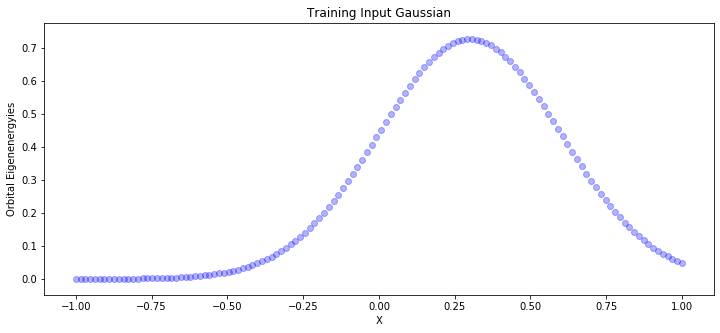

In [5]:
#Set variables 
from torch.autograd import Variable
x =Variable(x)
y = Variable(y)

plt.figure(figsize=(12,5))
plt.scatter(x.data.numpy(), y.data.numpy(), color = "blue", alpha = 0.3)
plt.title('Training Input Gaussian')
plt.xlabel('X')
plt.ylabel('Orbital Eigenenergyies')

 

plt.show()

In [6]:
def MAE(y,y_hat,epoch):
    res = 0
    for i in range(len(y)):
        res += abs(y[i] - y_hat[i])
    return res/len(y)

In [48]:
#Algorithm for generating the Gaussians
'''
A = []
B = []
for a in range(0,5):
    for b in range(0,5):
        B.append(b)
A.append(B)
A[0][:5]
'''

[0, 1, 2, 3, 4]

In [164]:
class Model(nn.Module):
        def __init__(self, n_feature, n_hidden, n_output):
            super(Model, self).__init__()
            self.hidden = torch.nn.Linear(n_feature, n_hidden)   
            self.predict = torch.nn.Linear(n_hidden, n_output)   

        def forward(self, x):
            #x = F.relu(self.hidden(x))
            x = F.elu(self.hidden(x))      
        
            x = self.predict(x)             
            return x

mod = Model(n_feature=1, n_hidden=10, n_output=1)

    #We can experiment with Stochastic Gradient Descent or Adam depending on preference
optimizer = torch.optim.SGD(mod.parameters(), lr=0.1)
loss_func = torch.nn.MSELoss()  #activation function for hidden layer


EPOCHS = 2000
arr_loss = []
arr_mae = []
for i in range(1,EPOCHS+1):
    
    

        
    prediction = mod(x)      

    loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)

    optimizer.zero_grad()    
    loss.backward()          
    optimizer.step()        
    arr_loss.append(loss.data.numpy())
    arr_mae.append(MAE(y.data,prediction.data,i).numpy())
    
    print('Epoch: ', i, 'Loss = %.4f' % loss.data.numpy(),
         'MAE: ', MAE(y.data,prediction.data,i).numpy())


"\nclass Model(nn.Module):\n        def __init__(self, n_feature, n_hidden, n_output):\n            super(Model, self).__init__()\n            self.hidden = torch.nn.Linear(n_feature, n_hidden)   \n            self.predict = torch.nn.Linear(n_hidden, n_output)   \n\n        def forward(self, x):\n            #x = F.relu(self.hidden(x))\n            x = F.elu(self.hidden(x))      \n        \n            x = self.predict(x)             \n            return x\n\nmod = Model(n_feature=1, n_hidden=10, n_output=1)\n\n    #We can experiment with Stochastic Gradient Descent or Adam depending on preference\noptimizer = torch.optim.SGD(mod.parameters(), lr=0.1)\nloss_func = torch.nn.MSELoss()  #activation function for hidden layer\n\n\nEPOCHS = 2000\narr_loss = []\narr_mae = []\nfor i in range(1,EPOCHS+1):\n    \n    \n\n        \n    prediction = mod(x)      \n\n    loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)\n\n    optimizer.zero_grad()    \n    loss.backward()     

### Metrics For Single Instance of Training NN

Text(0.5, 1.0, 'Loss Vs Epochs')

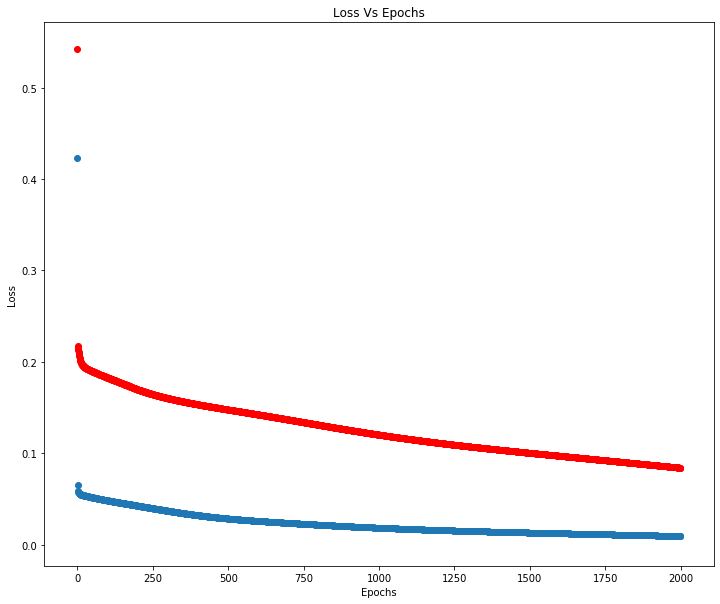

In [95]:
#Loss Function Metrics

e = np.linspace(0,len(arr_loss) - 1, len(arr_loss))
plt.figure(figsize=(12,10))
plt.scatter(e, np.array(arr_loss))
plt.scatter(e, np.array(arr_mae), color = 'red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Vs Epochs')

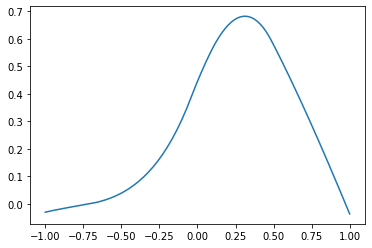

In [24]:
#Sample generated Gaussian associated with the above loss, mae functions graphed
plt.plot(x.data.numpy(), prediction.data.numpy())

In [ ]:
#MAE 
plt.figure(figsize=(12,10))
plt.scatter(e, np.array(arr_mae))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Vs Epochs')

In [104]:
EPOCHS = 2000
y_pred = []

arr_pred = []

#We initialize the neural network each time we train within the same cell to avoid overtraining
# it by accident
class GaussNN(nn.Module):
        
        def __init__(self, n_feature, n_hidden, n_output):
            super(GaussNN, self).__init__()
            self.hidden = torch.nn.Linear(n_feature, n_hidden)   
            self.predict = torch.nn.Linear(n_hidden, n_output)   

        def forward(self, x):
            x = F.elu(self.hidden(x))      
            x = self.predict(x)             
            return x
        
        
G = GaussNN(n_feature=1, n_hidden=10, n_output=1)
#We can experiment with Stochastic Gradient Descent or Adam depending on preference
optimizer = torch.optim.SGD(G.parameters(), lr=0.1)
loss_func = torch.nn.MSELoss()  #activation function for hidden layer

for j in range(1,501):
    for i in range(1,EPOCHS+1):
          
        prediction = G(x)      

        loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)
        optimizer.zero_grad()    
        loss.backward()          
        optimizer.step()          
    y_pred.append(prediction.data)
arr_pred.append(y_pred)

In [105]:
#There are 500 Gaussians
len(arr_pred[0])

500

In [106]:
#Each Gaussian contains 128 predicted y values (y_pred)
len(arr_pred[0][1])

128

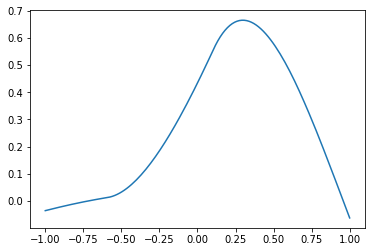

In [107]:
#1st of 100 Gaussians generated
plt.plot(x.data.numpy(), np.array(arr_pred[0][1].tolist()))

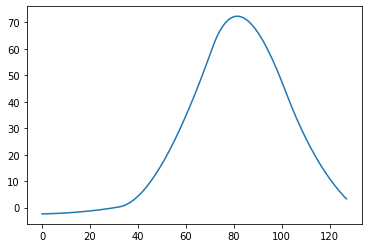

In [108]:
#98th of 100 Gaussians generated
plt.plot(x.data.numpy(), np.array(arr_pred[0][98].tolist())*100)

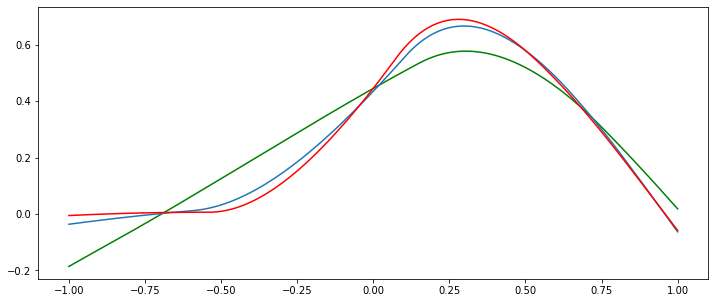

In [109]:
plt.figure(figsize=(12,5))
plt.plot(x.data.numpy(), np.array(arr_pred[0][0].tolist()),color='green')
plt.plot(x.data.numpy(), np.array(arr_pred[0][1].tolist()))
plt.plot(x.data.numpy(), np.array(arr_pred[0][2].tolist()),color = 'red')
#Below are three randomly selected Gaussians from the sample of 500 generated with average of 0.3

Text(1.0, 0, 'Loss = 0.0001')

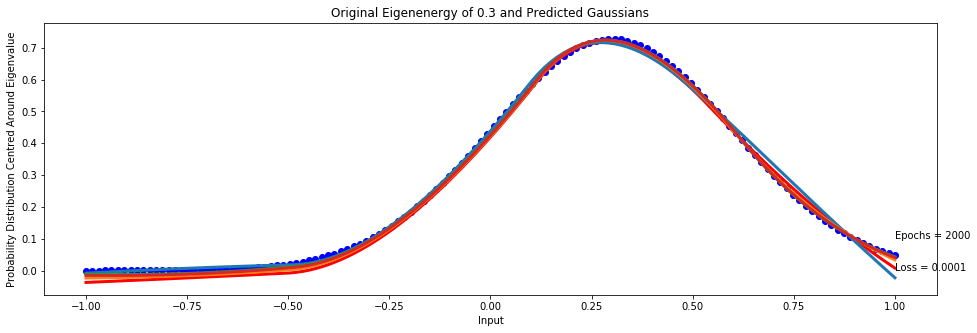

In [110]:
plt.figure(figsize=(16,5))
plt.scatter(x.data.numpy(), y.data.numpy(), color = "blue")
plt.xlabel('Input')
plt.ylabel('Probability Distribution Centred Around Eigenvalue')
plt.title('Original Eigenenergy of 0.3 and Predicted Gaussians')
plt.plot(x.data.numpy(), np.array(arr_pred[0][31].tolist()), 'red', lw=3)
plt.plot(x.data.numpy(), np.array(arr_pred[0][11].tolist()), lw=3)
plt.plot(x.data.numpy(), np.array(arr_pred[0][103].tolist()),  lw=3)
plt.plot(x.data.numpy(), np.array(arr_pred[0][375].tolist()),  lw=3)
plt.plot(x.data.numpy(), np.array(arr_pred[0][231].tolist()),  lw=3)
plt.text(1.0, 0.1, 'Epochs = %d' % EPOCHS,)
plt.text(1.0, 0, 'Loss = %.4f' % loss.data.numpy())

### Above is a set of 5 random curves out of all 500 generated that approximates the blue scatterplot of the eigenvalue we're training over.

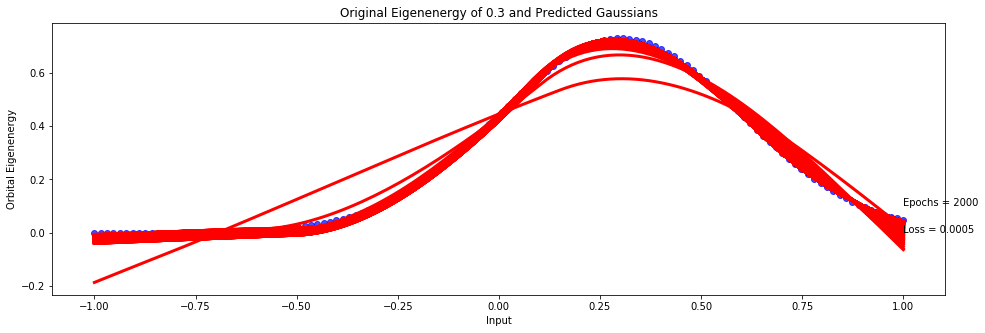

In [120]:
plt.figure(figsize=(16,5))
plt.scatter(x.data.numpy(), y.data.numpy(), color = "blue", alpha = 0.7)
plt.xlabel('Input')
plt.ylabel('Orbital Eigenenergy')
plt.title('Original Eigenenergy of 0.3 and Predicted Gaussians')
plt.text(1.0, 0.1, 'Epochs = %d' % EPOCHS,)
plt.text(1.0, 0, 'Loss = %.4f' % loss.data.numpy())
#All 500 Gaussians fitted to the curve
for i in range(0,500):
    plt.plot(x.data.numpy(), np.array(arr_pred[0][i].tolist()), 'red', lw=3) 

### Red above is the set of all 500 Gaussians trained over the initial input (blue). After  2000 epochs of training, the results are so close that you can hardly see the original, blue curve of our input Gaussian data.

In [118]:
###Using a different value of eigenvalue, i.e. 0.7
w = torch.unsqueeze(torch.linspace(-1, 1, 128), dim=1)  
u = w
#Here is the Gaussian distribution defined!
v =  A*torch.exp(-u.pow(2)/Denom, out=None) 
u = Variable(u)
v = Variable(v)

In [159]:
EPOCHS = 2000
y_pred_2 = []

arr_pred_2 = []

#We initialize the neural network each time we train within the same cell to avoid overtraining
# it by accident
class GaussNN(nn.Module):
        
        def __init__(self, n_feature, n_hidden, n_output):
            super(GaussNN, self).__init__()
            self.hidden = torch.nn.Linear(n_feature, n_hidden)   
            self.predict = torch.nn.Linear(n_hidden, n_output)   

        def forward(self, x):
            x = F.elu(self.hidden(x))      
            x = self.predict(x)             
            return x

G = GaussNN(n_feature=1, n_hidden=10, n_output=1)

#It is crucial to adjust the learning rate as necessary for every eigenvalue, because it appears
#that there is a relationship.
optimizer = torch.optim.SGD(G.parameters(), lr=0.19)
loss_func = torch.nn.MSELoss()  
#Reducing the range of the outer j forloop is convenient to check the overall appearance of the
#Gaussians without excessive runtimes used
for j in range(1,501):
    for i in range(1,EPOCHS+1):
          
        preds = G(x)      

        loss = loss_func(preds, v)      
        optimizer.zero_grad()    
        loss.backward()          
        optimizer.step()          
    y_pred_2.append(preds.data)
arr_pred_2.append(y_pred_2)

In [165]:
len(arr_pred_2[0])

In [23]:
len(w)

128

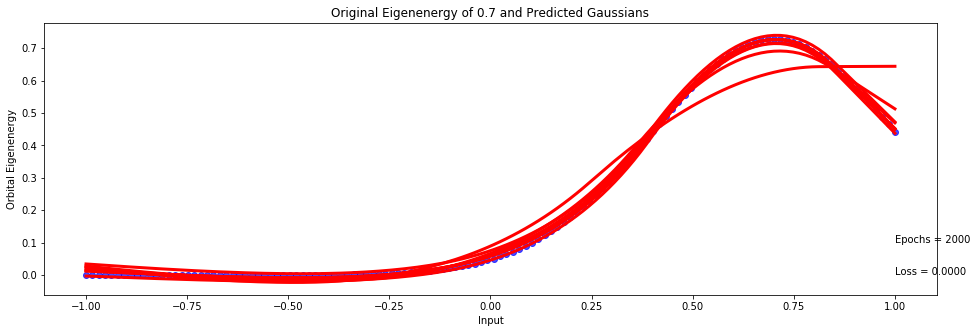

In [37]:
plt.figure(figsize=(16,5))
plt.scatter(w.data.numpy(), v.data.numpy(), color = "blue", alpha = 0.7)
plt.xlabel('Input')
plt.ylabel('Orbital Eigenenergy')
plt.title('Original Eigenenergy of 0.7 and Predicted Gaussians')
plt.text(1.0, 0.1, 'Epochs = %d' % EPOCHS,)
plt.text(1.0, 0, 'Loss = %.4f' % loss.data.numpy())

for i in range(1,9):
    plt.plot(w.data.numpy(), np.array(arr_pred_2[0][i].tolist()), 'red', lw=3)

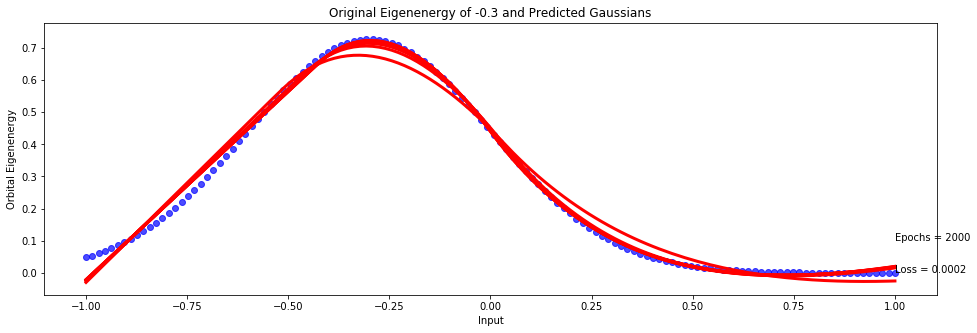

In [81]:
plt.figure(figsize=(16,5))
plt.scatter(w.data.numpy(), v.data.numpy(), color = "blue", alpha = 0.7)
plt.xlabel('Input')
plt.ylabel('Orbital Eigenenergy')
plt.title('Original Eigenenergy of 0.1 and Predicted Gaussians')
plt.text(1.0, 0.1, 'Epochs = %d' % EPOCHS,)
plt.text(1.0, 0, 'Loss = %.4f' % loss.data.numpy())

for i in range(1,9):
    plt.plot(w.data.numpy(), np.array(arr_pred_2[0][i].tolist()), 'red', lw=3)

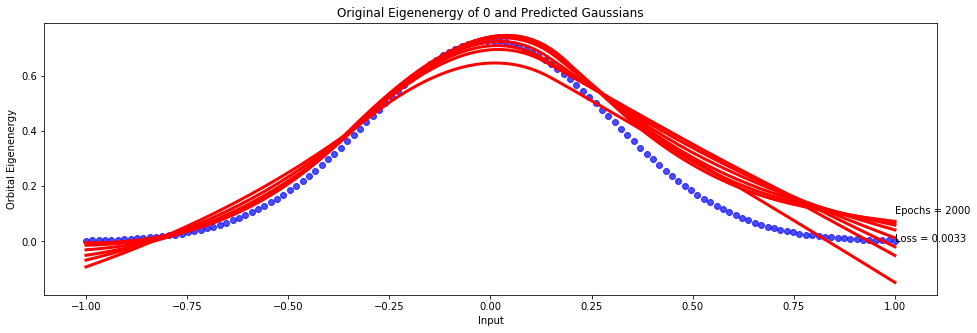

In [163]:
plt.figure(figsize=(16,5))
plt.scatter(w.data.numpy(), v.data.numpy(), color = "blue", alpha = 0.7)
plt.xlabel('Input')
plt.ylabel('Orbital Eigenenergy')
plt.title('Original Eigenenergy of 0 and Predicted Gaussians')
plt.text(1.0, 0.1, 'Epochs = %d' % EPOCHS,)
plt.text(1.0, 0, 'Loss = %.4f' % loss.data.numpy())

for i in range(1,9):
    plt.plot(w.data.numpy(), np.array(arr_pred_2[0][i].tolist()), 'red', lw=3)

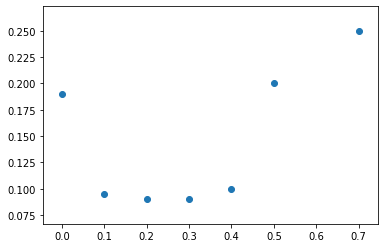

In [167]:
#These arrays contain the mapping of Learning Rate to Input Eigenvale.

LR = [0.19,0.095,0.09,0.09,0.1,0.2,0.25]
E  = [0.0,0.1,0.2,0.3,0.4,0.5,0.7] 
plt.scatter(E,LR)
#The Learning Rate vs Eigenvalue from (0,1)

In [166]:
import pandas as pd

In [168]:
df = pd.DataFrame({'Eigenvalue': E,
                   'Learning Rate': LR})

In [169]:
df

,Eigenvalue,Learning Rate
0,0.0,0.190
1,0.1,0.095
2,0.2,0.090
3,0.3,0.090
4,0.4,0.100
5,0.5,0.200
6,0.7,0.250
